In [48]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


In [49]:
def plotar(x, y, data, title='', xLabel='', yLabel=''):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=data)
  ax.figure.set_size_inches(14,5)
  ax.set_title(title, loc='left', fontsize=18)
  ax.set_xlabel(xLabel, fontsize=14)
  ax.set_ylabel(yLabel, fontsize=14)
  ax = ax

In [17]:
cafelura = pd.read_csv('../data/time_series_cafelura.csv')
quantidade_de_dias_fds = pd.read_csv('../data/time_series_dias_final_de_semana.csv')

In [23]:
print(cafelura.info())
print('\n')
print(quantidade_de_dias_fds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   quantidade_de_dias  24 non-null     int64
dtypes: int64(1)
memory usage: 320.0 bytes
None


In [25]:
print("Quantidade de linhas e colunas {}".format(cafelura.shape))
print("Quantidade de valores nulos no geral {}".format(cafelura.isna().sum().sum()))
print(cafelura.head())
print(cafelura.dtypes)
print('\n')
print("Quantidade de linhas e colunas {}".format(quantidade_de_dias_fds.shape))
print("Quantidade de valores nulos no geral {}".format(quantidade_de_dias_fds.isna().sum().sum()))
print(quantidade_de_dias_fds.head())
print(quantidade_de_dias_fds.dtypes)


Quantidade de linhas e colunas (24, 2)
Quantidade de valores nulos no geral 0
          mes  vendas
0  2017-01-31     880
1  2017-02-28    1600
2  2017-03-31    3240
3  2017-04-30    3840
4  2017-05-31    5670
mes       object
vendas     int64
dtype: object


Quantidade de linhas e colunas (24, 1)
Quantidade de valores nulos no geral 0
   quantidade_de_dias
0                   8
1                   8
2                  10
3                   8
4                   9
quantidade_de_dias    int64
dtype: object


In [27]:
print(cafelura.mes.unique())
print('\n')
print(quantidade_de_dias_fds.quantidade_de_dias.unique())

['2017-01-31' '2017-02-28' '2017-03-31' '2017-04-30' '2017-05-31'
 '2017-06-30' '2017-07-31' '2017-08-31' '2017-09-30' '2017-10-31'
 '2017-11-30' '2017-12-31' '2018-01-31' '2018-02-28' '2018-03-31'
 '2018-04-30' '2018-05-31' '2018-06-30' '2018-07-31' '2018-08-31'
 '2018-09-30' '2018-10-31' '2018-11-30' '2018-12-31']


[ 8 10  9]


In [28]:
cafelura.mes = pd.to_datetime(cafelura.mes)
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

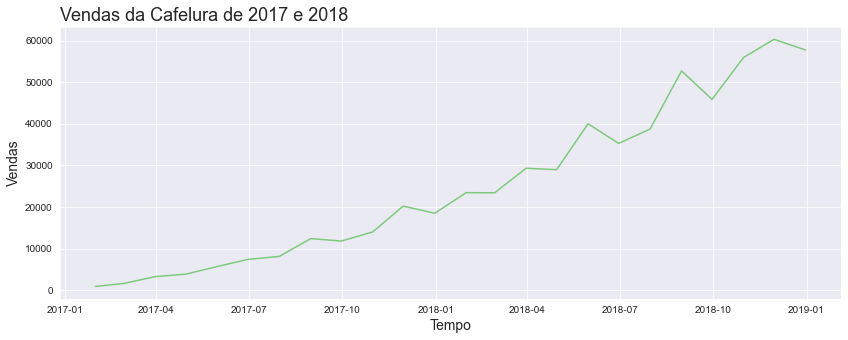

In [50]:
plotar('mes', 'vendas', cafelura, 'Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas')

In [29]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_fds.quantidade_de_dias.values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


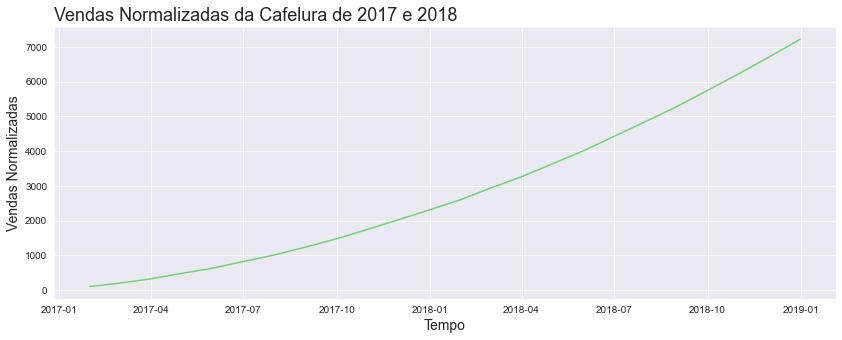

In [36]:
plotar('mes', 'vendas_normalizadas', cafelura, 'Vendas Normalizadas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas Normalizadas')

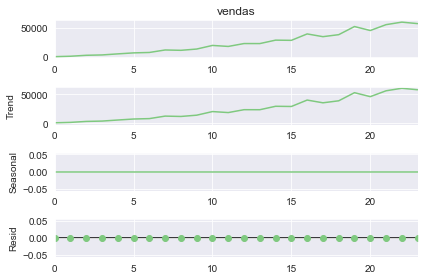

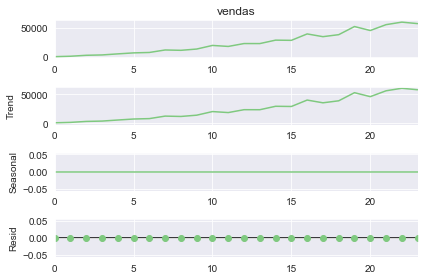

In [70]:
resultado = seasonal_decompose(x=cafelura.vendas, period=1)
resultado.plot()

In [73]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [74]:
data = pd.DataFrame(({ "observacao": observacao, 'tendencia': tendencia, 'sazonalidade':sazonalidade, 'ruido':ruido }))
data.head()

,observacao,tendencia,sazonalidade,ruido
0,880.0,880.0,0.0,0.0
1,1600.0,1600.0,0.0,0.0
2,3240.0,3240.0,0.0,0.0
3,3840.0,3840.0,0.0,0.0
4,5670.0,5670.0,0.0,0.0
